In [1]:
import numpy                       #Aqui carregamos numpy
from matplotlib import pyplot      #Aqui carregamos matplotlib
import time, sys



In [2]:
#isso faz os gráficos matplotlib aparecerem no notebook (em vez de em uma nova janela)
%matplotlib inline

In [3]:
#então execute tudo (Run All).
#O que acontece?
x = numpy.linspace(0., 2., num = 41)

nt = 25    #Número de passos de tempo que queremos calcular
dt = .025  #Tamanho de cada passo de tempo
c = 1      #Velocidade de propagação da onda

In [4]:
nx = x.size
dx = x[1] - x[0]

In [6]:
u = numpy.ones_like(x)   #Função ones_like do numpy


u[(0.5<=x) & (x<=1)] = 2 #Define u = 2 entre 0,5 e 1,
                         #de acordo com nossa CI

print(u)                 #Verificamos o resultado na tela

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


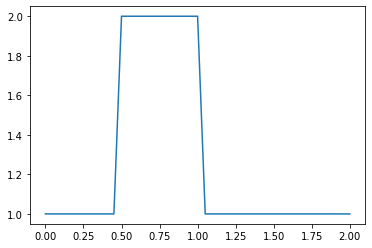

In [7]:
pyplot.plot(x, u);

In [8]:

for n in range(nt): #Laço para os valores de 0 a nt-1, então será executado nt vezes 
    un = u.copy()   ##Cópia dos valores de u para un
    for i in range(1, nx): ##Você pode tentar comentar essa linha...
    #for i in range(nx): ## ... e descomentar essa linha, para ver o que acontece!
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])


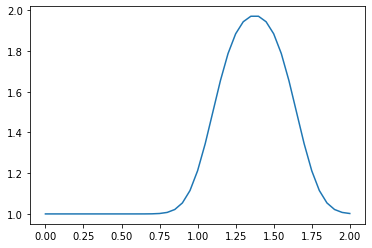

In [9]:
pyplot.plot(x, u);

In [10]:
from matplotlib import pyplot

def linearconv(nx):
    nt = 20    #Número de passos de tempo que queremos calcular
    c = 1      #Velocidade de propagação da onda
    sigma = .5

    x = numpy.linspace(0., 2., num = nx)
    nx = x.size
    dx = x[1] - x[0]

    dt = sigma * dx

    u = numpy.ones_like(x) 
    u[(0.5<=x) & (x<=1)] = 2

    un = numpy.ones_like(u)

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(x, u)

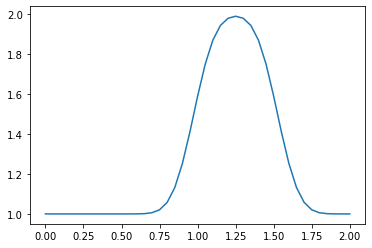

In [14]:
pyplot.show()
linearconv(41)

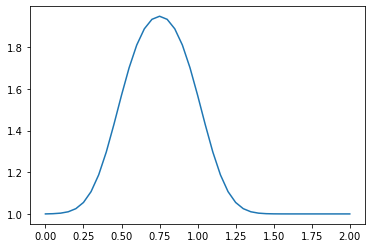

In [15]:
from matplotlib import pyplot #E nos preparamos para produzir gráficos
%matplotlib inline

x = numpy.linspace(0., 2., num = 41) #Coordenada espacial
nt = 20    #Número de passos de tempo que queremos calcular
nu = 0.3   #O valor para viscosidade
sigma = .2 #Sigma é um parâmetro, veremos mais detalhes em breve

nx = x.size
dx = x[1] - x[0]
dt = sigma * dx**2 / nu #dt é calculado em função de sigma, já saberemos o porquê

u = numpy.ones(nx) #Um arranjo numpy com nx elementos e todos iguais a 1
u[(0.5<=x) & (x<=1)] = 2 #Então definimos u = 2 entre 0,5 e 1, nossa CI

un = numpy.ones(nx) #Inicializar o arranjo temporário, para manter a solução no passo de tempo

for n in range(nt): #Laço temporal
    un = u.copy() ##Cópia dos valores de u para un
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        
pyplot.plot(x, u);

In [16]:
import numpy
import sympy

In [17]:
from sympy import init_printing
init_printing(use_latex=True)

In [18]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

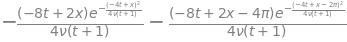

In [19]:
phiprime = phi.diff(x)
phiprime

In [20]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [21]:
%matplotlib inline

###Declaração de variáveis
nx = 101
nt = 100
dx = 2. * numpy.pi / (nx - 1)
nu = .07
dt = dx * nu

x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0

u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
u

NameError: name 'ufunc' is not defined